# Linear Programming Example with SciPy

Source: http://www.vision.ime.usp.br/~igor/articles/optimization-linprog.html

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.optimize import linprog
from numpy.linalg import solve

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

Problem in consideration

\begin{equation}
\begin{array}{rl}
\text{minimize}&f(x)=c^\top x\\
\text{s. t.}&Ax=b\\
&x\geq0
\end{array}
\end{equation}

Las Vegas

Probability or winning: $p_1$ and $p_2$


\begin{equation}
\begin{array}{rl}
\textrm{max}&0.4x_1+0.25x_2\\
\text{s. t.}&x_1 + x_2 \leq 100\\
&x_1 + x_2 \geq 10\\
&x_1 \geq 0\\
&x_2 \geq 0
\end{array}
\end{equation}

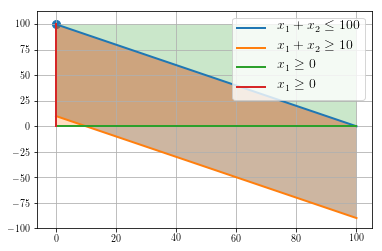

In [5]:
x1 = np.linspace(0, 100, 1000)
eq1 = 100 - x1
eq2 = 10-x1

%matplotlib inline
fig, ax = plt.subplots()
plt.plot(x1, eq1, linewidth=2, label='$x_1+x_2\leq100$')
ax.plot(x1, eq2, linewidth=2, label='$x_1+x_2\geq10$')
ax.plot(x1, 0*x1, linewidth=2, label='$x_1\geq0$')
ax.plot(0*x1, x1, linewidth=2, label='$x_1\geq0$')
ax.scatter(0, 100)
ax.fill_between(x1, 0, eq1, alpha=0.25)   # Fill between 0 and eq1
ax.fill_between(x1, eq2, 100, alpha=0.25) # Fill between eq2 and 100
ax.fill_between(x1, eq1, eq2, alpha=0.25) # Fill between eq1 and eq2
plt.grid(True)
ax.legend()

In [ ]:
A_ub = np.array([
[1, 1],
[-1, -1]])

b_ub = np.array([100, -10])

c = np.array([0.4, 0.25])

x1_bounds = (0, None)
x2_bounds = (0, None)

 
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(x1_bounds, x2_bounds), options={"disp": True})
print res
print('Optimal value:', res.fun, 'X:', res.x)

In [ ]:
x1 = np.linspace(0, 999, 100)
x2 = np.linspace(0, 999, 100)
x1, x2 = np.meshgrid(x1, x2)
x3 = 999 - x1 - x2

%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, x3, label='parametric curve')
